In [1]:
import numpy
import matplotlib.pyplot
import scipy.special #sigmoid function -> expit()
%matplotlib inline

In [2]:
# NEURAL NET CLASS
class neuralNetwork:
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        self.iNodes = inputNodes
        self.hNodes = hiddenNodes
        self.oNodes = outputNodes
        self.LR = learningRate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        #randomize link weights
#self.W_in_hid = numpy.random.rand(self.hNodes, self.iNodes) - 0.5
        self.W_in_hid = numpy.random.normal(0.0, pow(self.hNodes, -0.5), (self.hNodes, self.iNodes))
#self.W_hid_out = numpy.random.rand(self.oNodes, self.hNodes) - 0.5
        self.W_hid_out = numpy.random.normal(0.0, pow(self.oNodes, -0.5), (self.oNodes, self.hNodes))
        
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.W_in_hid, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.W_hid_out, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.W_hid_out.T, output_errors)
        
        self.W_hid_out += self.LR * numpy.dot((output_errors * final_outputs * (1.0-final_outputs)), numpy.transpose(hidden_outputs))
        self.W_in_hid += self.LR * numpy.dot((hidden_errors * hidden_outputs * (1.0-hidden_outputs)), numpy.transpose(inputs))
        pass
    
    def query(self, inputs_list):
        #take input to the neural network and returns the network's output
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.W_in_hid, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.W_hid_out, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [3]:
# INITIALIZING NEURAL NETWORK
iN = 784
hN = 100
oN = 10
LR = 0.3
nn = neuralNetwork(iN, hN, oN, LR)

In [4]:
# GETTING DATAS FROM TRAINING FILE & TRAIN NN
train_file = open("datasets/mnist_train_100.csv", "r")
train_data_list = train_file.readlines()
train_file.close()

'''REFORM THE DATAS AND PLOT'''
for record in train_data_list:
    data = record.split(',')
    inputs = (numpy.asfarray(data[1:]) / 255. *0.99) + 0.01

    targets = numpy.zeros(oN) + 0.01
    targets[int(data[0])] = 0.99
    nn.train(inputs, targets)
    pass

NN's prediction: 7
Accuracy: 86.982%


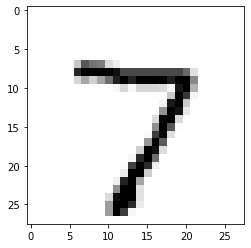

In [7]:
# GET DATAS FROM TESTING FILE
test_file = open("datasets/mnist_test_10.csv", "r")
test_data_list = test_file.readlines()
test_file.close()

data = test_data_list[0].split(',')
inputs = (numpy.asfarray(data[1:]) / 255. *0.99) + 0.01
outputs = nn.query(inputs)
ans = numpy.argmax(outputs)
accuracy = outputs[ans][0] * 100

print(f"NN's prediction: {ans}\nAccuracy: {accuracy:.3f}%")
#     plot target answer
imgArr = inputs.reshape((28,28))
matplotlib.pyplot.imshow(imgArr, cmap='Greys', interpolation='None')
